In [3]:
import pickle
import umap
import numpy as np
import matplotlib

import matplotlib.pyplot as plt
import seaborn as sns

# Path to the pickle file
#mms lid 126
# filename = "/home/projects/vokquant/accent-recog-slt2022/CommonAccent/results/W2V2/AT/mms-lid-126-augmented/3001/save/embeddings/embeddings_Stage.VALID.pkl"
# w2v2 xlsr 53 large
filename = "/home/projects/vokquant/accent-recog-slt2022/CommonAccent/results/W2V2/AT/wav2vec2-large-xlsr-53-augmented/7001/save/embeddings/embeddings_Stage.VALID.pkl"
# Initialize an empty list to store all loaded embeddings
loaded_embeddings = []

# Load the data from the pickle file
with open(filename, 'rb') as f:
    try:
        while True:
            # Append the loaded data to the list
            loaded_embeddings.extend(pickle.load(f))
    except EOFError:
        pass  # End of file reached

# # Check loaded data
# for id, embedding in loaded_embeddings:
#     print(f"ID: {id}, Embedding: {embedding.shape}")



# Get the embeddings
embeddings = np.array([embedding for id, embedding in loaded_embeddings])
print(embeddings.shape)
ids = np.array([id for id, embedding in loaded_embeddings])
print(ids.shape)
print("unique ids",np.unique(ids).shape)
labels = np.unique(ids)



/home/lorenzg/miniconda3/envs/dicla_torch/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


(8213, 1024)
(8213,)
unique ids (109,)


In [21]:
import os
filename = (os.path.join("/home/projects/vokquant/accent-recog-slt2022/notebooks/pickle_files", "embeddings_and_accents.pkl"))

# Initialize an empty list to store all loaded embeddings
loaded_embeddings = []

# Load the data from the pickle file
# with open(os.path.join("/home/projects/vokquant/accent-recog-slt2022/notebooks/pickle_files", "embeddings_and_accents.pkl"), "wb") as f:
#     pickle.dump((embeddings_w2v2, accents), f)

with open(filename, 'rb') as f:
    accents = pickle.load(f)
embeddings_w2v2, accents = accents
embeddings_w2v2 = np.array(embeddings_w2v2)
ids_w2v2 = np.array(accents)
# print((accents[1]))
# # Get the embeddings
# embeddings = np.array([embedding for id, embedding in loaded_embeddings])
# print(embeddings_w2v2.shape)
embeddings_w2v2 = embeddings_w2v2.reshape(embeddings_w2v2.shape[0],-1)
print(embeddings_w2v2.shape)
# ids = np.array([id for id, embedding in loaded_embeddings])
print(ids_w2v2.shape)
print("unique ids",np.unique(ids_w2v2).shape)
labels = np.unique(ids_w2v2)

(573, 1, 1024)
(573, 1024)
(573,)
unique ids (16,)


# Encode the target dialect numbers

In [3]:
class_mapping = {
'62390': 0, '70221': 1, '30860': 2, '31035': 3, '50413': 4, '41706': 5, '70709': 6, '80105': 7, '40719': 8, '70334': 9, '70406': 10, '31405': 11, '32210': 12, '70627': 13, '50304': 14, '70706': 15, '31207': 16, '40702': 17, '40423': 18, '40410': 19, '32309': 20, '41411': 21, '10702': 22, '70208': 23, '70734': 24, '50626': 25, '80225': 26, '30501': 27, '70622': 28, '40621': 29, '50621': 30, '62216': 31, '41342': 32, '61032': 33, '30910': 34, '10903': 35, '50617': 36, '31110': 37, '70615': 38, '20622': 39, '20914': 40, '80411': 41, '50612': 42, '50502': 43, '61627': 44, '32324': 45, '70516': 46, '10925': 47, '40806': 48, '80239': 49, '20321': 50, '80227': 51, '70804': 52, '80128': 53, '41804': 54, '31652': 55, '61257': 56, '30719': 57, '60350': 58, '50509': 59, '70402': 60, '20619': 61, '10401': 62, '61628': 63, '70824': 64, '70606': 65, '50206': 66, '61254': 67, '62105': 68, '31916': 69, '50210': 70, '40402': 71, '61115': 72, '70908': 73, '70419': 74, '70366': 75, '61743': 76, '32518': 77, '40914': 78, '31617': 79, '31401': 80, '50212': 81, '80212': 82, '41501': 83, '70326': 84, '40605': 85, '70362': 86, '70217': 87, '62144': 88, '10428': 89, '32519': 90, '10612': 91, '41102': 92, '50618': 93, '32002': 94, '50506': 95, '21002': 96, '62135': 97, '20604': 98, '61251': 99, '50423': 100, '31814': 101, '70825': 102, '31551': 103, '80109': 104, '31204': 105, '61756': 106, '70920': 107, '70504': 108
}

# add bundesland to each number according to the first number in class mapping
# number 1 is for Burgenland, 2 for Kärnten, 3 for Niederösterreich, 4 for Oberösterreich, 5 for Salzburg, 6 for Steiermark, 7 for Tirol, 8 for Vorarlberg

# Sigle	Gemeinde	Gemeindekennziffer	Bundesland
# AN_MJ	Annaberg	31401	Niederösterreich
# WE_WJ	Weikendorf	30860	Niederösterreich
# AR_MA	Arbing	41102	Oberösterreich
# HC_WJ	Hirschbach im Mühlkreis	40605	Oberösterreich
# AL_MJ	Neuberg an der Mürz	62144	Steiermark
# JS_WA	Sankt Johann im Saggautal	61032	Steiermark
# SL_MJ	Lesachtal	20321	Kärnten
# PE_WA	Feldkirchen in Kärnten	21002	Kärnten
# BD_MA	Berndorf bei Salzburg	50304	Salzburg
# SU_WJ	Stuhlfelden	50621	Salzburg
# BX_MJ	Brixen im Thale	70402	Tirol
# WD_WA	Waidring	70419	Tirol
# FO_MJ	Fontanella	80109	Vorarlberg
# ME_WA	Mellau	80227	Vorarlberg
# AP_MA	Apetlon	10702	Burgenland
# EZ_WA	Unterwart	10925	Burgenland
male_female_dict = { 31401: 'M', 30860: 'W', 41102: 'M', 40605: 'W', 62144: 'M', 61032: 'W', 20321: 'M', 21002: 'W', 50304: 'M', 50621: 'W', 70402: 'M', 70419: 'W', 80109: 'M', 80227: 'W', 10702: 'M', 10925: 'W'}
# check if M (male) or W (weiblich) in class_mapping
# TODO: Loop through each key-value pair in the class_mapping dictionary
# for key, value in male_female_dict.items():
#     print(f"key: {key}, value: {value}")
class_mapping = {v: k for k, v in class_mapping.items()}
print(class_mapping)
# Loop through each key-value pair in the class_mapping dictionary
for key, value in class_mapping.items():
    # Convert the value to string to check the first digit
    value_str = str(value)
    
    # Check the first character of the value to determine the Bundesland
    if value_str[0] == '1':
        class_mapping[key] = f"{value_str} bgld"
    elif value_str[0] == '2':
        class_mapping[key] = f"{value_str} ktn"
    elif value_str[0] == '3':
        class_mapping[key] = f"{value_str} noe"
    elif value_str[0] == '4':
        class_mapping[key] = f"{value_str} ooe"
    elif value_str[0] == '5':
        class_mapping[key] = f"{value_str} sbg"
    elif value_str[0] == '6':
        class_mapping[key] = f"{value_str} stmk"
    elif value_str[0] == '7':
        class_mapping[key] = f"{value_str} t"
    elif value_str[0] == '8':
        class_mapping[key] = f"{value_str} vbg"
    elif value_str[0] == '9':
        class_mapping[key] = f"{value_str} w"
    else:
        print(f"error: Unrecognized first digit '{value_str[0]}' for key '{key}'")

    # Check if the value is in the male_female_dict
    if int(value) in male_female_dict:
        # Append gender information from male_female_dict
        class_mapping[key] = f"{class_mapping[key]} {male_female_dict[int(value)]}"

print(class_mapping)
# map ids to class


{0: '62390', 1: '70221', 2: '30860', 3: '31035', 4: '50413', 5: '41706', 6: '70709', 7: '80105', 8: '40719', 9: '70334', 10: '70406', 11: '31405', 12: '32210', 13: '70627', 14: '50304', 15: '70706', 16: '31207', 17: '40702', 18: '40423', 19: '40410', 20: '32309', 21: '41411', 22: '10702', 23: '70208', 24: '70734', 25: '50626', 26: '80225', 27: '30501', 28: '70622', 29: '40621', 30: '50621', 31: '62216', 32: '41342', 33: '61032', 34: '30910', 35: '10903', 36: '50617', 37: '31110', 38: '70615', 39: '20622', 40: '20914', 41: '80411', 42: '50612', 43: '50502', 44: '61627', 45: '32324', 46: '70516', 47: '10925', 48: '40806', 49: '80239', 50: '20321', 51: '80227', 52: '70804', 53: '80128', 54: '41804', 55: '31652', 56: '61257', 57: '30719', 58: '60350', 59: '50509', 60: '70402', 61: '20619', 62: '10401', 63: '61628', 64: '70824', 65: '70606', 66: '50206', 67: '61254', 68: '62105', 69: '31916', 70: '50210', 71: '40402', 72: '61115', 73: '70908', 74: '70419', 75: '70366', 76: '61743', 77: '325

In [4]:
ids = np.array([class_mapping[id] for id in ids])
print(ids)

['70516 t' '80105 vgb' '50413 sbg' ... '70706 t' '41342 ooe' '70516 t']


# Get region codes and coordinates

In [5]:
import pandas as pd
csv_file = "/home/projects/vokquant/data/dicla/Reflist-2162-Österreichische-Ortschaften.csv"

# Load the CSV file into a DataFrame
df = pd.read_csv(csv_file, sep=',', encoding='utf-8')

# Ortschaftskennzahl	Name	Postleitzahl: Postleitzahl	Gemeinde: Gemeindekennzahl	Gemeinde: Name
header = ['Ortschaftskennzahl', 'Name', 'Postleitzahl', 'Gemeindekennzahl', 'Gemeinde']
df.columns = header

# make dictionary of Gemeindekennzahl and Gemeinde
gemeinde_dict = dict(zip(df['Gemeindekennzahl'], df['Gemeinde']))
print(gemeinde_dict)

gemeinde_dict_test_list = [10702, 10925, 20321, 21002, 30860, 31401,
                          40605, 41102, 50304, 50621, 61032, 62144,
                          70402, 70419, 80109, 80227]


gemeinde_dict_test = {k: gemeinde_dict[k] for k in gemeinde_dict_test_list}
print(gemeinde_dict_test)


{90001: 'Wien', 80424: 'Zwischenwasser', 80423: 'Weiler', 80422: 'Viktorsberg', 80421: 'Übersaxen', 80420: 'Sulz', 80419: 'Schnifis', 80418: 'Schlins', 80417: 'Satteins', 80416: 'Röthis', 80415: 'Röns', 80414: 'Rankweil', 80413: 'Meiningen', 80412: 'Mäder', 80411: 'Laterns', 80410: 'Koblach', 80409: 'Klaus', 80408: 'Götzis', 80407: 'Göfis', 80406: 'Fraxern', 80405: 'Frastanz', 80404: 'Feldkirch', 80403: 'Dünserberg', 80402: 'Düns', 80401: 'Altach', 80303: 'Lustenau', 80302: 'Hohenems', 80301: 'Dornbirn', 80240: 'Wolfurt', 80239: 'Warth', 80238: 'Sulzberg', 80237: 'Sibratsgfäll', 80236: 'Schwarzenberg', 80235: 'Schwarzach', 80234: 'Schröcken', 80233: 'Schoppernau', 80232: 'Schnepfau', 80231: 'Riefensberg', 80230: 'Reuthe', 80229: 'Möggers', 80228: 'Mittelberg', 80227: 'Mellau', 80226: 'Lochau', 80225: 'Lingenau', 80224: 'Lauterach', 80223: 'Langenegg', 80222: 'Langen bei Bregenz', 80221: 'Krumbach', 80220: 'Kennelbach', 80219: 'Hohenweiler', 80218: 'Hörbranz', 80217: 'Höchst', 80216: 'H

# Get Austrian map

In [6]:
import geopandas as gpd
import requests
import zipfile
import os
import io
import matplotlib.pyplot as plt
import osmnx as ox

# Step 1: Download the shapefile zip file
url = "https://naciscdn.org/naturalearth/110m/cultural/ne_110m_admin_0_countries.zip"
zip_file_path = "ne_110m_admin_0_countries.zip"

response = requests.get(url)
if response.status_code == 200:
    with open(zip_file_path, 'wb') as f:
        f.write(response.content)

# Step 2: Extract the zip file
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall("natural_earth_data")
os.remove(zip_file_path)
# Step 3: Load the shapefile using GeoPandas
shapefile_path = "natural_earth_data/ne_110m_admin_0_countries.shp"
world = gpd.read_file(shapefile_path)
# Step 4: Filter for Austria
austria = world[world['NAME'] == 'Austria']

# Plot dialects in map

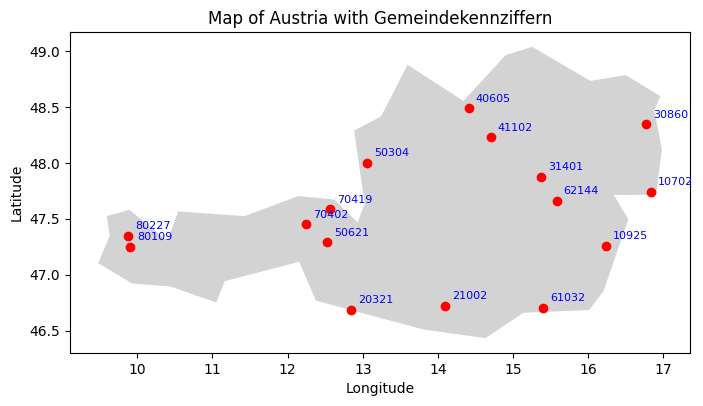

In [7]:
# Step 6: Get coordinates for each place using OSMnx
# add "M" or "W" in gemeinde_dict_test according to the dict male_female_dict
# for k, place in gemeinde_dict_test.items():
#     # print("k")
#     if k in male_female_dict.keys():
#         print(f"key found: {k}")
#         new_place = str(k) + " " + male_female_dict[k]
#         print(f"new place: {new_place}")
#         # update key in dict
        
coordinates = {}
for k, place in gemeinde_dict_test.items():
    location = ox.geocoder.geocode(f"{place}, Austria")
    if location:
        coordinates[k] = location
        # print(f"Coordinates of {place}: {location}")
    else:
        print(f"Location {place} not found")

# Step 7: Plot Austria and mark the locations
fig, ax = plt.subplots(figsize=(8, 8))
austria.plot(ax=ax, color='lightgray')

latitudes = [coord[0] for coord in coordinates.values()]
longitudes = [coord[1] for coord in coordinates.values()]

# Step 8: Mark the Gemeindekennziffern on the map
ax.scatter(longitudes, latitudes, color='red')

# Add annotations for each Gemeindekennziffern
for k, (lat, lon) in zip(coordinates.keys(), coordinates.values()):
    ax.annotate(k, xy=(lon, lat), xytext=(5, 5), textcoords='offset points', fontsize=8, color='blue')

plt.title('Map of Austria with Gemeindekennziffern')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()



/home/lorenzg/miniconda3/envs/dicla_torch/lib/python3.10/site-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


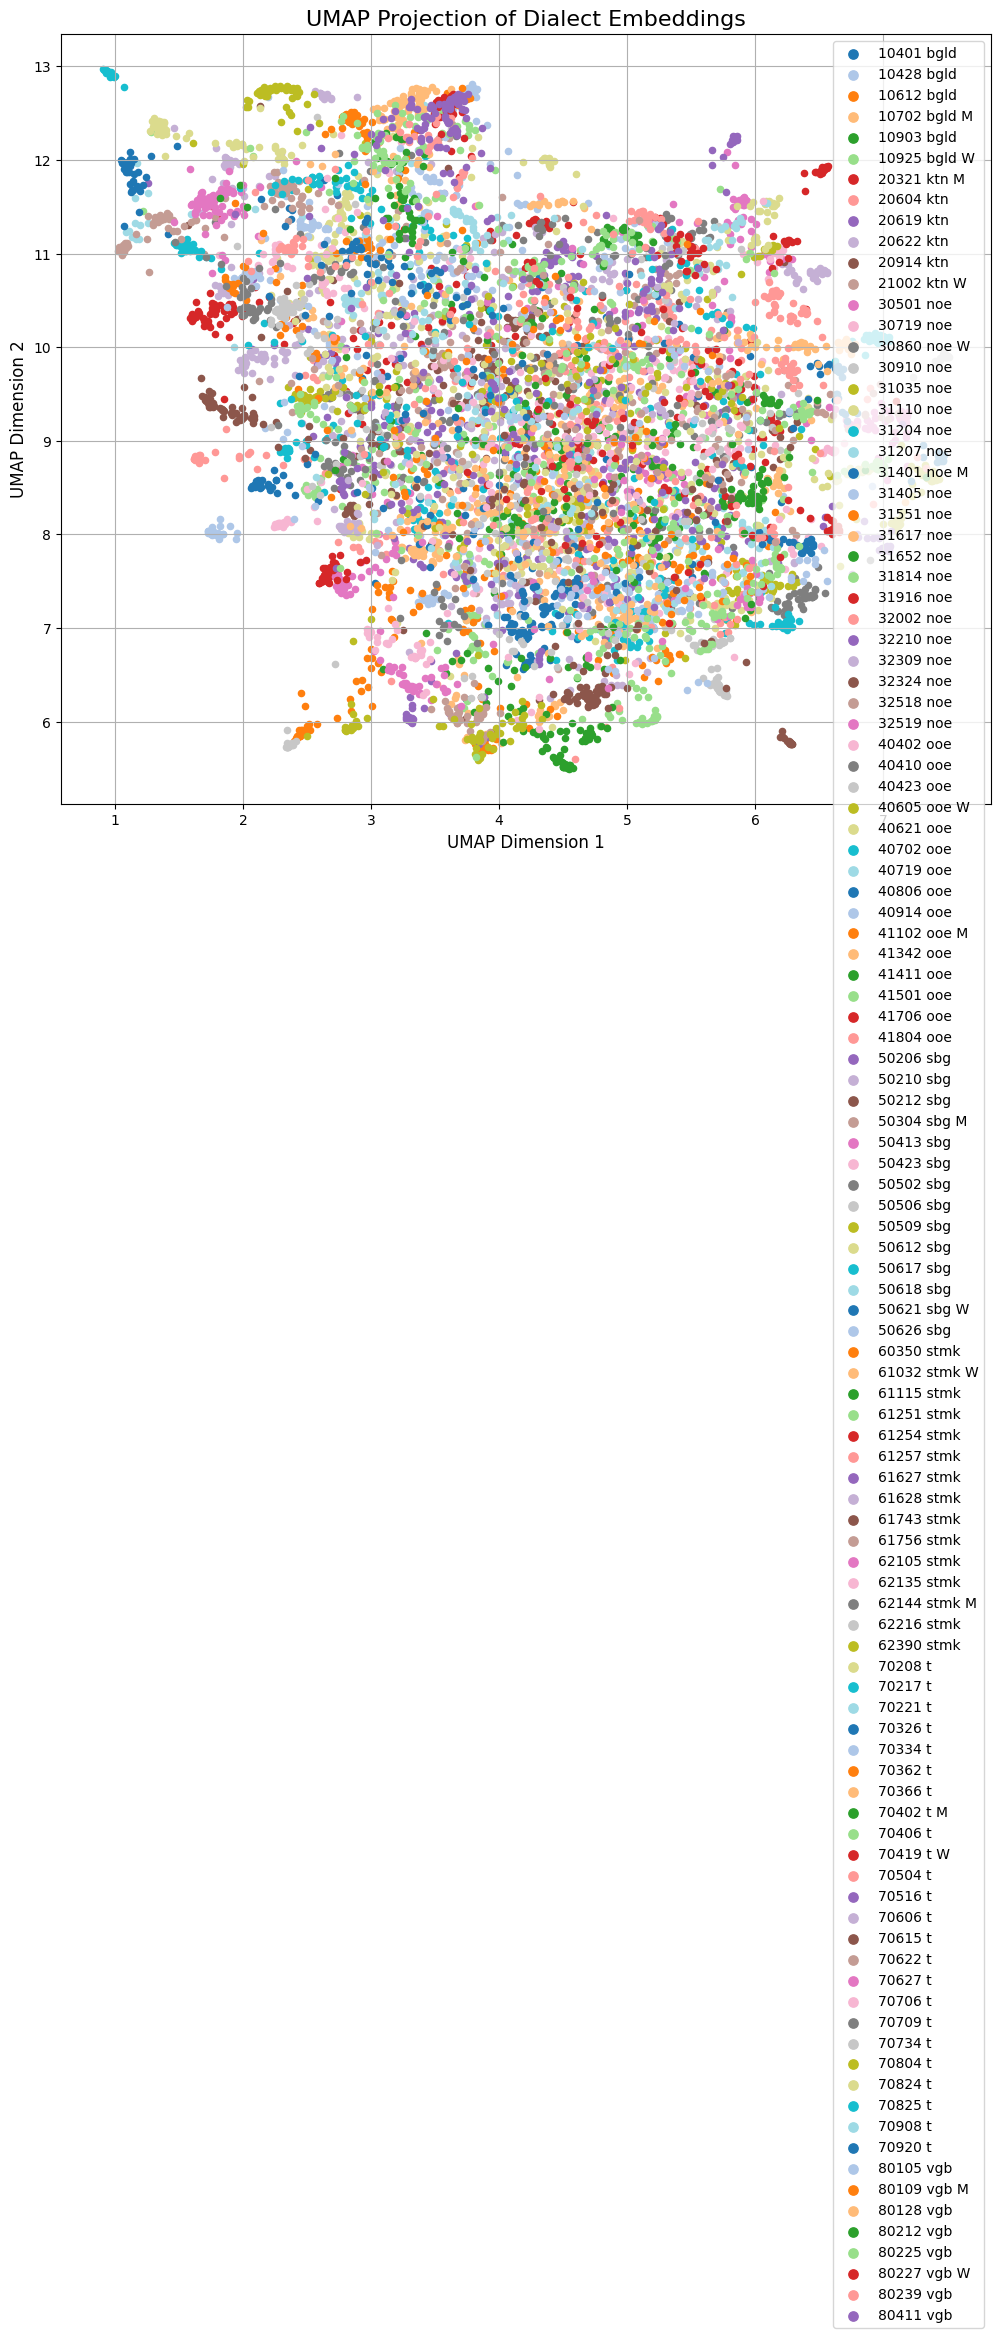

In [8]:
# Reduce the dimensionality of the embeddings
reducer = umap.UMAP(n_neighbors=50, min_dist=0.05, n_components=2, random_state=42)
embedding_2d = reducer.fit_transform(embeddings)

palette = sns.color_palette("tab20", n_colors=len(np.unique(ids)))

# Plot the embeddings with labels
plt.figure(figsize=(12, 10))

# Scatter plot with different colors for each unique dialect (label)
for i, label in enumerate(np.unique(ids)):
    idx = ids == label
    plt.scatter(embedding_2d[idx, 0], embedding_2d[idx, 1], 
                label=f"{label}", s=20, 
                c=[palette[i]], marker='o', alpha=1.0)

plt.title("UMAP Projection of Dialect Embeddings", fontsize=16)
plt.xlabel("UMAP Dimension 1", fontsize=12)
plt.ylabel("UMAP Dimension 2", fontsize=12)

# Add legend with smaller size
plt.legend(loc='best', fontsize=10, markerscale=1.5)
plt.grid(True)
plt.show()


In [9]:
import plotly.express as px
import pandas as pd

# Convert 'ids' to categorical for distinct color mapping
df = pd.DataFrame({
    'UMAP_1': embedding_2d[:, 0],
    'UMAP_2': embedding_2d[:, 1],
    'Dialect': ids.astype(str)  # Convert to string to ensure discrete color mapping
})

# Create the interactive scatter plot with discrete colors for each dialect
fig = px.scatter(
    df, 
    x='UMAP_1', 
    y='UMAP_2', 
    color='Dialect',  # Color points by dialect (discrete values)
    title="UMAP Projection of Dialect Embeddings",
    labels={'UMAP_1': 'UMAP Dimension 1', 'UMAP_2': 'UMAP Dimension 2'},
    template='plotly_white',
    category_orders={'Dialect': sorted(df['Dialect'].unique())},  # Ensure consistent ordering of dialects
)

# Customize marker size and transparency
fig.update_traces(marker=dict(size=6, opacity=0.9))
fig.update_layout(legend_title_text='Dialect')

# Start with all traces unchecked
fig.for_each_trace(lambda trace: trace.update(visible='legendonly'))
# Show the interactive plot
fig.show()


In [10]:
import umap
import plotly.express as px
import pandas as pd

# Reduce to 3D
reducer = umap.UMAP(n_neighbors=50, min_dist=0.05, n_components=3, random_state=42)
embedding_3d = reducer.fit_transform(embeddings)

# Convert 'ids' to categorical for distinct color mapping
df = pd.DataFrame({
    'UMAP_1': embedding_3d[:, 0],
    'UMAP_2': embedding_3d[:, 1],
    'UMAP_3': embedding_3d[:, 2],
    'Dialect': ids.astype(str)  # Convert to string to ensure discrete color mapping
})

# Create the interactive 3D scatter plot with discrete colors for each dialect
fig = px.scatter_3d(
    df,
    x='UMAP_1',
    y='UMAP_2',
    z='UMAP_3',
    color='Dialect',  # Color points by dialect (discrete values)
    title="3D UMAP Projection of Dialect Embeddings",
    labels={'UMAP_1': 'UMAP Dimension 1', 'UMAP_2': 'UMAP Dimension 2', 'UMAP_3': 'UMAP Dimension 3'},
    template='plotly_white',
    category_orders={'Dialect': sorted(df['Dialect'].unique())},  # Ensure consistent ordering of dialects
)

# Customize marker size and transparency
fig.update_traces(marker=dict(size=4, opacity=0.7))
fig.update_layout(legend_title_text='Dialect')

# Start with all traces unchecked
fig.for_each_trace(lambda trace: trace.update(visible='legendonly'))

# Show the interactive plot
fig.show()


/home/lorenzg/miniconda3/envs/dicla_torch/lib/python3.10/site-packages/umap/umap_.py:1945: UserWarning:

n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.

